**Importing the required dependenicies**


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

**Importing the crop recommendation dataset**

In [57]:
dataset= pd.read_csv("Crop_recommendation.csv")
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**EDA: Exploratory Data Analysis**

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [59]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

**Column names**

In [60]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [61]:
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**Types of Data**

In [62]:
dataset.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [63]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


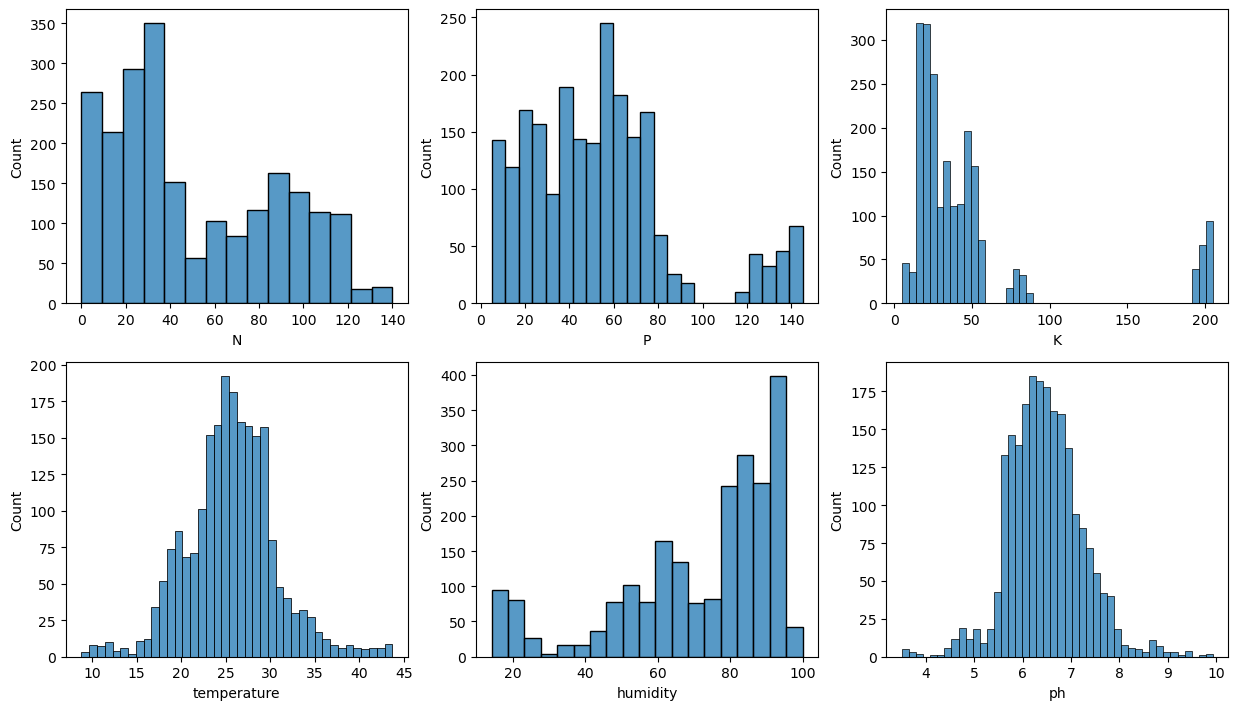

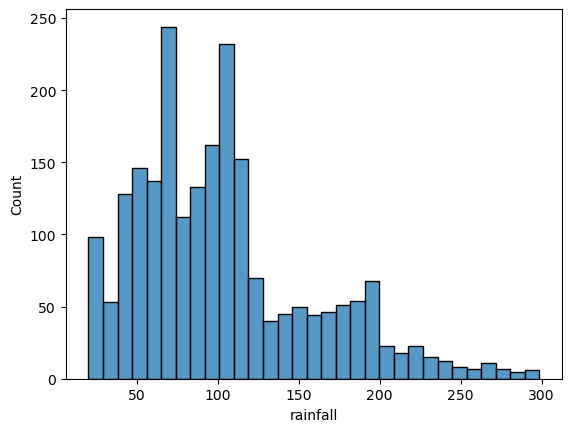

In [64]:
all_columns = dataset.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(dataset[column])
    i+=1
plt.show()

sns.histplot(dataset[all_columns[-1]])
plt.show()

In [65]:
features = dataset[['N','P','K','temperature','humidity','ph','rainfall']]
target = dataset['label']

**Initialzing empty lists to append all model's name and corresponding name**

In [66]:
acc = []
model = []

In [67]:
X= dataset.iloc[:,0:-1].values
Y= dataset.iloc[:,-1].values

**Splitting the data into training data and testing data**

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,random_state = 2)

In [112]:
print(y_train)

['cotton' 'mungbean' 'kidneybeans' ... 'mungbean' 'banana' 'orange']


# **DECISION TREE**

In [69]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [70]:
predicted_DT = DecisionTree.predict(X_test)

**Confusion Matrix for Decision Tree Classifier**

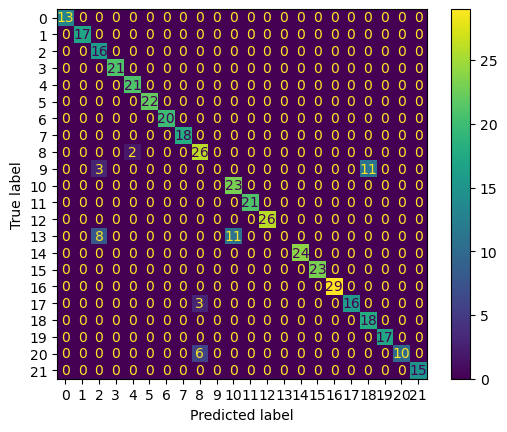

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_DT = confusion_matrix(y_test, predicted_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT)
disp.plot()
plt.show()

**Accuracies achieved by Decision Tree Classifier**

In [72]:
x = metrics.accuracy_score(y_test,predicted_DT)
acc.append(x)
y= metrics.recall_score(y_test,predicted_DT, average = "weighted")
z= f1_score(y_test,predicted_DT, average = "weighted")
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)
print("Recall score is : ", y)
print("f1_score is : ", z)

print("\nClassification Report: \n",classification_report(y_test,predicted_DT))

Decision Tree's accuracy is 90.0
Recall score is :  0.9
f1_score is :  0.8706620473436312

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       


**Cross Validation**

In [73]:
score = cross_val_score(DecisionTree,features,target,cv = 5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

**Standard Deviation**

In [74]:
sd1 = (score.std()*100)
sd1

2.4240530229042525

# **NAIVE BAYES(GAUSSIAN)**

In [75]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

GaussianNB()

In [76]:
predicted_NB = Naive_Bayes.predict(X_test)

**Confusion Matrix for Naive Bayes Classifier**

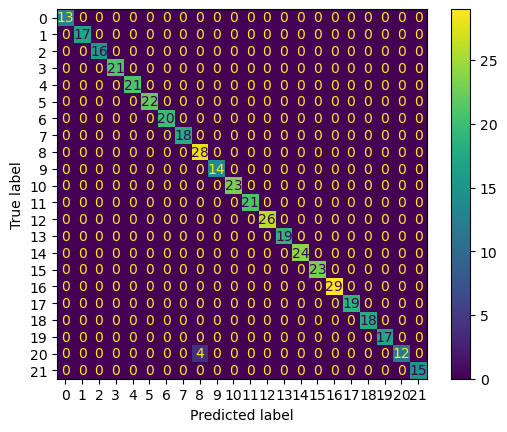

In [77]:
cm_NB = confusion_matrix(y_test, predicted_NB)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB)
disp.plot()
plt.show()

**Accuracies achieved by Naive Bayes Classifier**

In [78]:
x = metrics.accuracy_score(y_test,predicted_NB)
acc.append(x)
y= metrics.recall_score(y_test,predicted_NB, average = "weighted")
z= f1_score(y_test,predicted_NB, average = "weighted")
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)
print("Recall score is : ", y)
print("f1_score is : ", z)

print("\nClassification Report: \n",classification_report(y_test,predicted_NB))

Naive Bayes accuracy is 99.0909090909091
Recall score is :  0.990909090909091
f1_score is :  0.9905627705627705

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        

**Cross Validation**

In [79]:
score = cross_val_score(Naive_Bayes,features,target,cv = 5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

**Standard Deviation**

In [80]:
sd2 = (score.std()*100)
sd2

0.222680885707559

# **LOGISTIC REGRESSION**

In [81]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)


LogisticRegression()

In [82]:
predicted_LR = LogReg.predict(X_test)

**Confusion Matrix for Logisctic Regression Classifier**

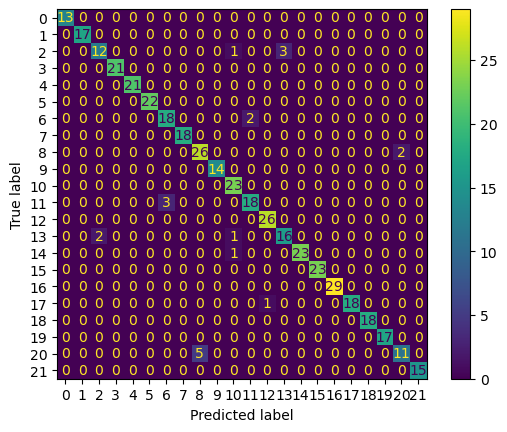

In [83]:
cm_LR = confusion_matrix(y_test, predicted_LR)
from sklearn.metrics import ConfusionMatrixDisplay
dispLR = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
dispLR.plot()
plt.show()

**Accuracies achieved by Logistic Regression Classifier**

In [84]:
x = metrics.accuracy_score(y_test,predicted_LR)
acc.append(x)
y= metrics.recall_score(y_test,predicted_LR, average = "weighted")
z= f1_score(y_test,predicted_LR, average = "weighted")
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print("Recall score is : ", y)
print("f1_score is : ", z)

print("\nClassification Report: \n",classification_report(y_test,predicted_LR))

Logistic Regression Accuracy is 95.22727272727273
Recall score is :  0.9522727272727273
f1_score is :  0.9515750364130678

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.

**Cross Validation**

In [85]:
score = cross_val_score(LogReg,features,target,cv = 5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

**Standard Deviation**

In [86]:
sd3 = (score.std()*100)
sd3

1.0102777623133108

# **K-Nearest Neighbors(KNN)**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
predicted_KNN = KNN.predict(X_test)

**Confusion Matrix for KNN Classifier**

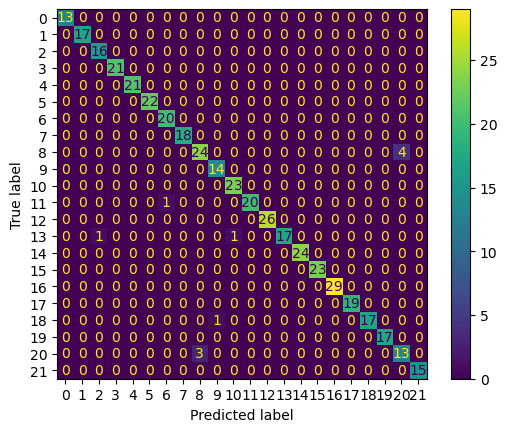

In [89]:
cm_KNN = confusion_matrix(y_test, predicted_KNN)
from sklearn.metrics import ConfusionMatrixDisplay
dispLR = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
dispLR.plot()
plt.show()

**Accuracies achieved by KNN Classifier**

In [90]:
x = metrics.accuracy_score(y_test, predicted_KNN)
acc.append(x)
y= metrics.recall_score(y_test,predicted_KNN, average = "weighted")
z= f1_score(y_test,predicted_KNN, average = "weighted")
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print("Recall score is : ", y)
print("f1_score is : ", z)

print("\nClassification Report: \n",classification_report(y_test,predicted_KNN))

KNN Accuracy is:  97.5
Recall score is :  0.975
f1_score is :  0.9750354867384481

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00    

**Cross Validation**

In [91]:
score = cross_val_score(KNN,features,target,cv = 5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

**Standard Deviation**

In [92]:
sd4 = (score.std()*100)
sd4

0.1437398936440164

#  **RANDOM FOREST**

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy', random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=29, random_state=0)

In [94]:
predicted_RF = RF.predict(X_test)

In [111]:
print(predicted_RF)

['coffee' 'pomegranate' 'pomegranate' 'cotton' 'mungbean' 'coffee'
 'watermelon' 'coconut' 'pigeonpeas' 'mango' 'chickpea' 'jute' 'papaya'
 'mothbeans' 'mango' 'maize' 'orange' 'blackgram' 'cotton' 'orange'
 'banana' 'kidneybeans' 'muskmelon' 'banana' 'mango' 'kidneybeans'
 'coconut' 'coconut' 'jute' 'mungbean' 'pomegranate' 'chickpea' 'mungbean'
 'mungbean' 'blackgram' 'coffee' 'cotton' 'muskmelon' 'blackgram'
 'blackgram' 'papaya' 'pomegranate' 'pomegranate' 'jute' 'mothbeans'
 'pomegranate' 'pomegranate' 'mungbean' 'coffee' 'chickpea' 'coffee'
 'blackgram' 'cotton' 'pigeonpeas' 'cotton' 'lentil' 'mungbean' 'banana'
 'lentil' 'orange' 'jute' 'jute' 'pigeonpeas' 'grapes' 'pigeonpeas'
 'grapes' 'grapes' 'pomegranate' 'coffee' 'maize' 'apple' 'orange'
 'chickpea' 'mango' 'banana' 'maize' 'banana' 'jute' 'pomegranate'
 'mungbean' 'mango' 'banana' 'rice' 'mothbeans' 'banana' 'muskmelon'
 'orange' 'maize' 'maize' 'coconut' 'rice' 'orange' 'mango' 'orange'
 'orange' 'muskmelon' 'banana' 'ma

**Confusion Matrix for Random Forest Classifier**

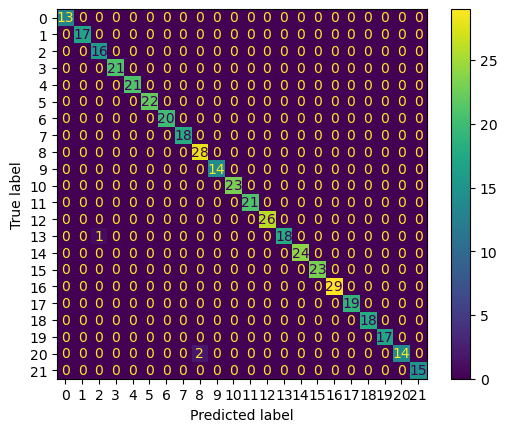

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_RF = confusion_matrix(y_test, predicted_RF)
from sklearn.metrics import ConfusionMatrixDisplay
dispLR = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
dispLR.plot()
plt.show()

**Accuracies achieved by Random Forest Classifier**

In [96]:
x = metrics.accuracy_score(y_test,predicted_RF)
acc.append(x)
y= metrics.recall_score(y_test,predicted_RF, average = "weighted")
z= f1_score(y_test,predicted_RF, average = "weighted")
model.append('Random Forest')
print("Random Forest Accuracy is : ",x * 100)
print("Recall score is : ", y)
print("f1_score is : ", z)

print("\nClassification Report: \n", classification_report(y_test,predicted_RF))

Random Forest Accuracy is :  99.31818181818181
Recall score is :  0.9931818181818182
f1_score is :  0.9931123956672545

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00 

**Cross Validation**

In [97]:
score = cross_val_score(RF,features,target,cv = 5)
score

array([0.99772727, 0.99090909, 0.99545455, 0.99318182, 0.98636364])

**Standard Deviation**

In [98]:
sd5 = (score.std()*100)
sd5

0.3910147848655738

# **ACCURACY COMPARISION**

<Axes: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

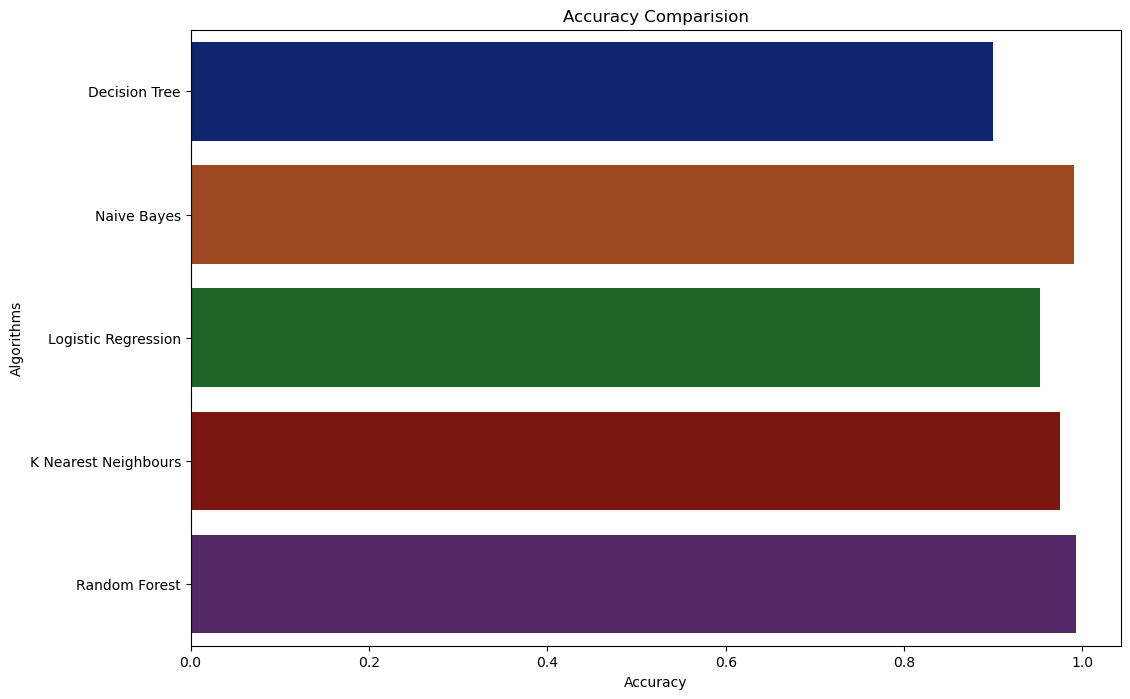

In [99]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [100]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

Decision Tree --> 90.0 %
Naive Bayes --> 99.0909090909091 %
Logistic Regression --> 95.22727272727273 %
K Nearest Neighbours --> 97.5 %
Random Forest --> 99.31818181818181 %


# **STANDARD DEVIATION COMPARISONS**


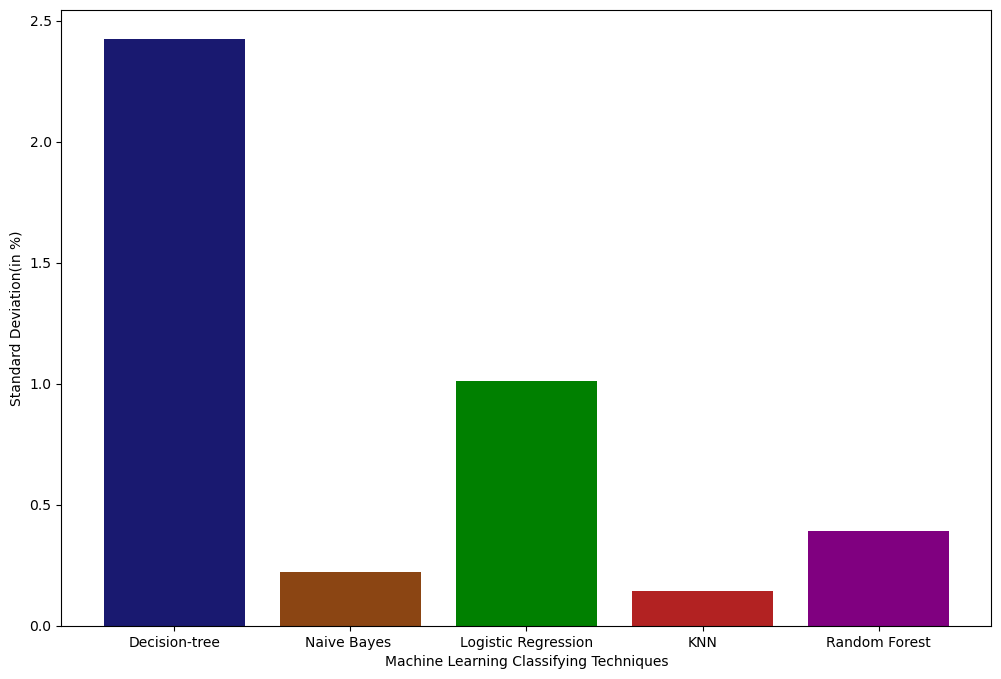

In [101]:
Algorithms = [ 'Decision-tree','Naive Bayes ', 'Logistic Regression','KNN','Random Forest',]
Accuracy = [sd1, sd2, sd3, sd4, sd5]

x_pos = np.arange(len(Accuracy))

plt.figure(figsize = [12,8])
plt.bar(x_pos, Accuracy, color= ['midnightblue','saddlebrown','green','firebrick', 'purple' ])

plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

plt.show()

# **Prediction using Random Forest Classifier (Model with highest accuracy)**

In [102]:
data = np.array([[90, 42, 43, 20,82, 6.50, 202.9]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [103]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [104]:
dataset.shape

(2200, 8)

In [105]:
# def predict_crop(N, P, K, temperature, humidity, ph, ranifall ):
#     index= np.where(X.columns== N)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = N
#     x[1] = P
#     x[2] = K
#     x[3] = temperature
#     x[4] = humidity
#     x[5] = ph
#     x[6] = ranifall

#     if index >= 0:
#         x[index] = 1

#     return RF.predict([x])[0]
    

In [106]:
# predict_crop(90, 42, 43, 20,82, 6.50, 202.9)

In [107]:
import sklearn
print(sklearn.__version__)

1.2.2


In [108]:
from joblib import dump, load

# Save model
dump(RF, 'Crop_Final.joblib')

# Load model
RF = load('Crop_Final.joblib')

In [109]:
import pickle
with open('Crop_Final.pkl', 'wb') as f:
    pickle.dump(RF, f)

In [110]:
import json
columns = {
    'data_columns' : [col.lower() for col in dataset.columns]
}

with open("columns.json" , "w") as f:
    f.write(json.dumps(columns))